In [2]:
from pathlib import Path

import cv2
import nengo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import itti_koch_niebur_nengo as iknn

try again w/simplified input

In [27]:
toy_S = np.array([1,2,3,4]).reshape([2, 2])
toy_S_flat = toy_S.flatten()

In [48]:
net = nengo.Network()
with net:
    S_node = nengo.Node(output=toy_S_flat)
    
    pulv_dims = S_node.size_out
    pulvinar = nengo.Ensemble(n_neurons=100, dimensions=pulv_dims)
    nengo.Connection(S_node, pulvinar)
    p_pulv = nengo.Probe(pulvinar, synapse=0.01)
    
    wta = iknn.fef.LCA(dimensions=pulv_dims, n_neurons=100)
    nengo.Connection(pulvinar, wta.input)
    p_wta = nengo.Probe(wta.output, synapse=0.01)

    wta_max = nengo.Ensemble(n_neurons=100, dimensions=1, radius=10)
    wta_max_c = nengo.Connection(wta.output, wta_max, function=np.argmax)
    p_wta_max = nengo.Probe(wta_max, synapse=0.03)
    p_wta_max_c = nengo.Probe(wta_max_c)
    
    wta_round = nengo.Ensemble(n_neurons=100, dimensions=1, radius=10)
    wta_round_c = nengo.Connection(wta_max, wta_round, 
                                   function= lambda x: int(np.round(x))
                                  )
    p_wta_round = nengo.Probe(wta_round, synapse=0.01)

In [49]:
sim = nengo.Simulator(network=net)
with sim:
    sim.run(0.4)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

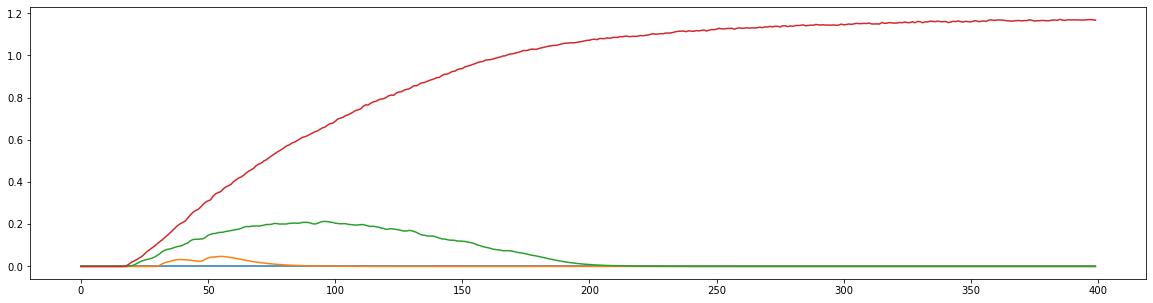

In [50]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(np.arange(400), sim.data[p_wta]);

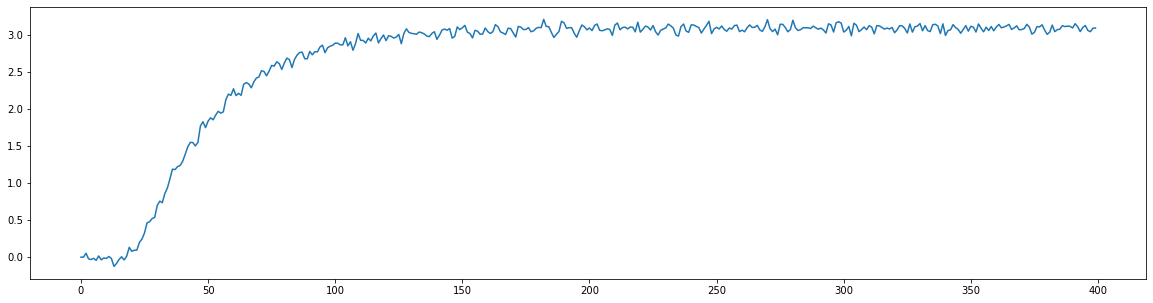

In [51]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(np.arange(400), sim.data[p_wta_max]);

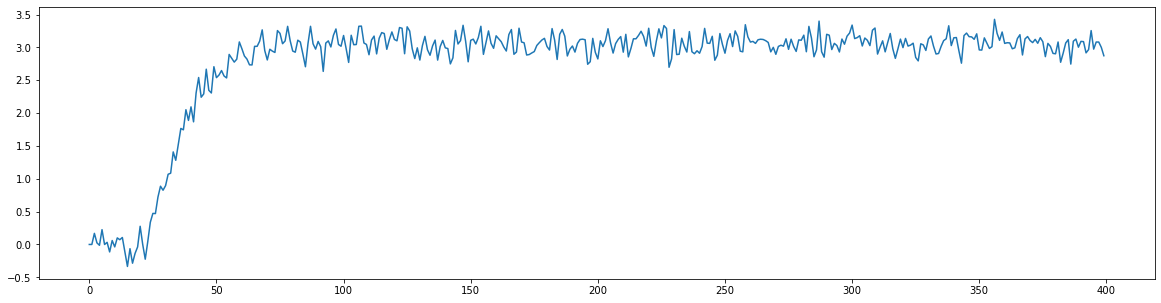

In [52]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(np.arange(400), sim.data[p_wta_round]);

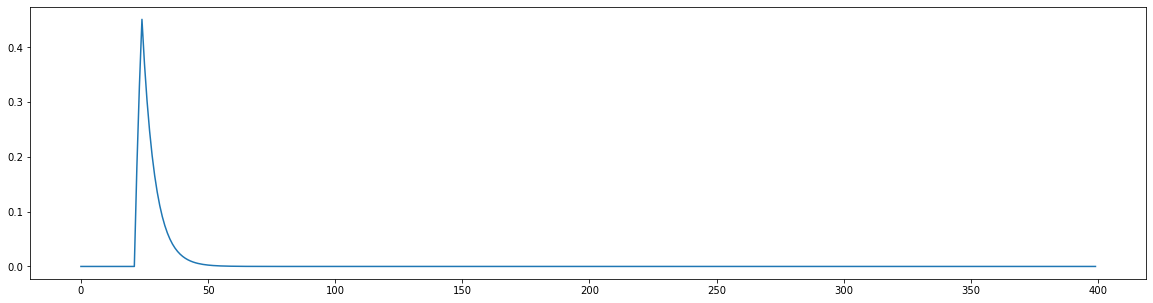

In [15]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(np.arange(400), sim.data[p_wta_max_c]);